<h1 style='Color:blue'>EDA and Feature Engineering</h1>

Before forecasting the data it is very important to understand the data so this note book will have following contents
 * Hypothesis Generation
 * Getting the system ready and Loading the data
 * Data Structure and content
 * Feature Extraction
 * Exploratory Analysis

### Hypothesis Generation

Hypothesis generation helps us to point out the factors which might affect our dependent variable. Below are some of the Hypothesis that can affect the passenger count.

1. There will be an increase in the traffic as the years pass by.
2. THe traffic will be high from May to october.
3. Traffic on weekdays will be more as compared to the weekends/ holidays.
4. Traffic during the peak hours will be hight.

We will try to validate each of these hypothesis based on the dataset. Now lets have a look at the datase

### Getting the system ready and loading the data.

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [8]:
# #load the train and test data
train = pd.read_csv('data/Train_SU63ISt.csv')
test = pd.read_csv('data/Test_0qrQsBZ.csv')

In [3]:
#create copy of train and test
train_original = train.copy()
test_original = test.copy()

### Data Structure and Content

Lets dive deeper and have a look at the dataset. First of all lets have a look at the features in the train and test datasets


In [4]:
train.columns, test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [5]:
train.dtypes, test.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object, ID           int64
 Datetime    object
 dtype: object)

In [6]:
#displaying the shape of the dataset
print('Shape of Train: {}'.format(train.shape))
print('Shape of Test: {}'.format(test.shape))

Shape of Train: (18288, 3)
Shape of Test: (5112, 2)


In [7]:
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [9]:
train['Datetime'] = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M')
train_original['Datetime'] = pd.to_datetime(train_original.Datetime, format='%d-%m-%Y %H:%M')
test_original['Datetime'] = pd.to_datetime(test_original.Datetime, format='%d-%m-%Y %H:%M')
train.head()

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2


### Feature Extraction

We have made some hypothesis earlier and we need some additional feature to validate those hypothesis. We will extract the time and date from the datetime.

In [10]:
for i in (train, test, train_original, test_original):
    i['year'] = i.Datetime.dt.year
    i['month'] = i.Datetime.dt.month
    i['day'] = i.Datetime.dt.day
    i['Hour'] = i.Datetime.dt.hour

In [11]:
train.head()

,ID,Datetime,Count,year,month,day,Hour
0,0,2012-08-25 00:00:00,8,2012,8,25,0
1,1,2012-08-25 01:00:00,2,2012,8,25,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2
3,3,2012-08-25 03:00:00,2,2012,8,25,3
4,4,2012-08-25 04:00:00,2,2012,8,25,4


We made a hypothesis for the traffic pattern on weed day and weekend as well so we need to create these variables

In [12]:
train['day_of_week'] = train['Datetime'].dt.dayofweek
temp = train['Datetime']

In [13]:
#assign 1 if the day of the week is a weekend else 0
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0

In [14]:
temp2 = train['Datetime'].apply(applyer)
train['weekend'] = temp2
train.head()

,ID,Datetime,Count,year,month,day,Hour,day_of_week,weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [15]:
#indexing the datetime
train.index = train.Datetime

In [16]:
train.head(5)

,ID,Datetime,Count,year,month,day,Hour,day_of_week,weekend
Datetime,,,,,,,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


Lets visualize and see our time series

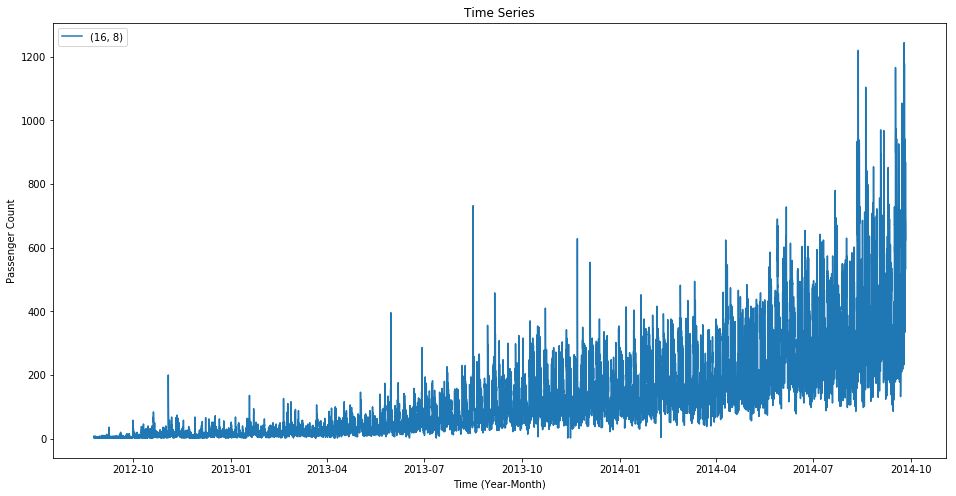

In [17]:
plt.figure(figsize=(16,8))
plt.plot(train['Count'], label =(16,8))
plt.title('Time Series')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Passenger Count')
plt.legend(loc = 'best')
plt.show()

Here, we can infer that there is an increasing trend in the timeseries, we can also see that there is a sudden increase in the counts at some point, this may be due to that particular day, We will figure out all these things and validate our hypothesis, using Exploratory Analysis.

### Exploratory Analysis

Our previous set hypothesis
* Traffic will increase as the year pass by
* Traffic will be high from May to october
* Traffic on weekdays will be more
* Traffic during the peak hours will be high

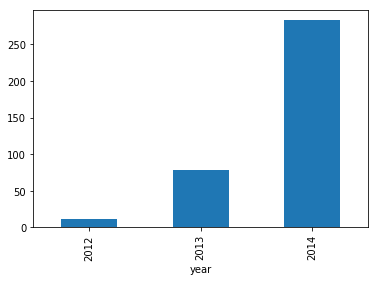

In [18]:
train.groupby('year')['Count'].mean().plot.bar()
plt.show()

We can see an exponential growth in the traffic with respect to year, WHich validates our first hypothesis.

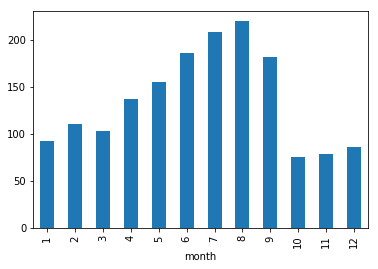

In [19]:
#look at our second hypothesis
train.groupby('month')['Count'].mean().plot.bar()
plt.show()

We can see the decrease in mean of passenger count in the last three months wich seems unusual, lets find out the reason

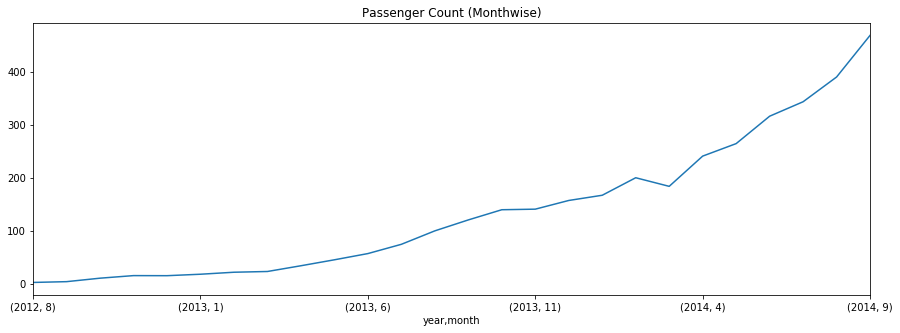

In [20]:
temp = train.groupby(['year','month'])['Count'].mean()
temp.plot(figsize = (15,5), title="Passenger Count (Monthwise)")
plt.show()

The month 10, 11 and 12 are not present in the year 2014 and mean value of these month for 2012 is also less, on the other hand mean value for other months is high because of lager passenger count int the year 2014, which resulted in the previously seen monthwise histogram

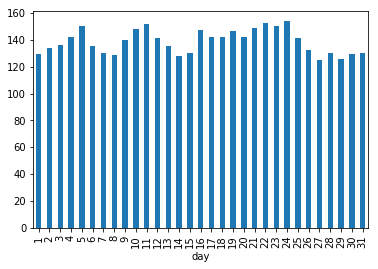

In [21]:
#daily mean of the passenger count
train.groupby('day')['Count'].mean().plot.bar()
plt.show()

Here we can make any inference, We have hypothesis that traffic will be more during peak hours, lets find out

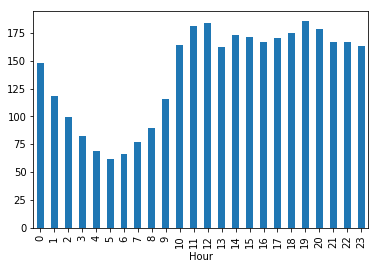

In [22]:
train.groupby('Hour')['Count'].mean().plot.bar()
plt.show()

* It can be inferred that the peak traffic is at 7PM and then we see a decreasing trend till 5 AM
* After that the passenger count starts increasing again and peaks again between 11AM and 12 Noon

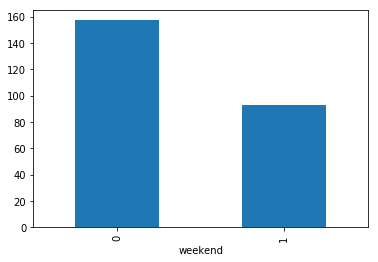

In [23]:
#hypothesis about less traffic on weekends
train.groupby('weekend')['Count'].mean().plot.bar()
plt.show()

It is clear from the graph that the traffic is more on weekdays and less on weekends. Now lets see the day wise passenger count

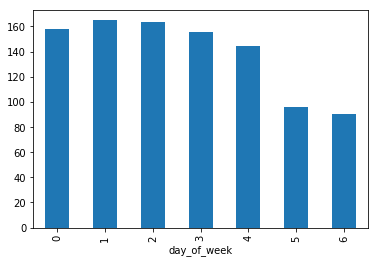

In [24]:
train.groupby('day_of_week')['Count'].mean().plot.bar()

We can see that the passenger count is less for saturday and sunday compared to other days.

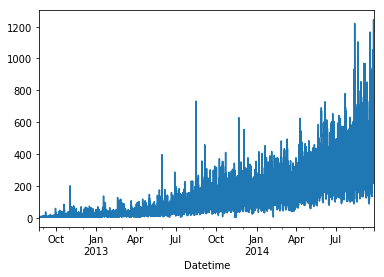

In [25]:
train.Count.plot()

As we can see that there is a lot of noise in the hourly time series, we will aggregate it to daily, weekly, and monthly time series and reduce the noise and make it more stable.

In [26]:
#hourly time series
hourly = train.resample('H').mean()

#converting to daily
daily = train.resample('D').mean()

#converting to weekly
weekly = train.resample('W').mean()

#converting to monthly
monthly = train.resample('M').mean()

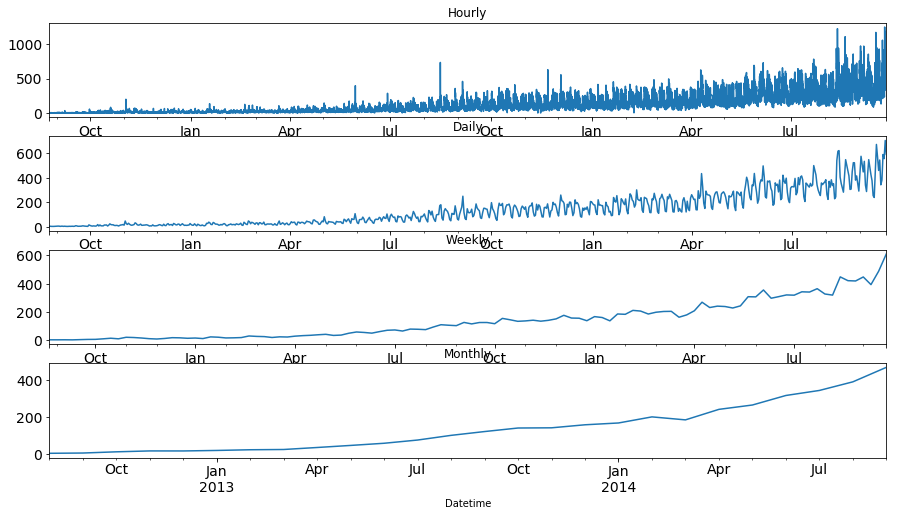

In [27]:
#ploting the above created time series
fig, ax = plt.subplots(4,1, figsize = (15, 8))

hourly.Count.plot(title = 'Hourly', fontsize = 14, ax = ax[0])
daily.Count.plot(title = 'Daily', fontsize = 14, ax = ax[1])
weekly.Count.plot(title = 'Weekly', fontsize = 14, ax = ax[2])
monthly.Count.plot(title = 'Monthly', fontsize = 14, ax = ax[3])
plt.show()

We can see that the time series is becoming more and more stable when we are aggregating it to daily, weekly and monthly basis.
However, it will be difficult to convert the monthly and weekly predictions to hourly predictions, so we will work on daily time series.

In [28]:
test.Timestamp = pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M')
test.index = test.Timestamp

train.Timestamp = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
train.index = train.Timestamp

#converting to daily mean
train = train.resample('D').mean()
test = test.resample('D').mean()

In [37]:
train.to_csv('data/train.csv')
test.to_csv('data/test.csv')
train_original.to_csv('data/train_original')
test_original.to_csv('data/test_original')